<a href="https://colab.research.google.com/github/IrinaAlaeva/folder-sync-script/blob/main/FP_Fake_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt: Klasifikace falešných zpráv

### Seznámení se s daty a popis úkolu


Vybrali jsme dataset z platformy Kaggle:
"Fake News Classification"

https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification



In [ ]:
import os
import pandas as pd
import kagglehub

In [ ]:
slozka = kagglehub.dataset_download("aadyasingh55/fake-news-classification")

In [ ]:
soubor = os.listdir(slozka)[0]

In [ ]:
data = pd.read_csv(slozka + os.sep + soubor, sep=';', on_bad_lines='skip', index_col=0)

In [ ]:
print("Sloupce v datasetu:")
print(data.columns)
print()

Sloupce v datasetu:
Index(['title', 'text', 'label'], dtype='object')



Dataset obsahuje následující sloupce:

    title – nadpis článku

    text – celý text článku

    label – cílová proměnná (0 = pravdivý článek, 1 = falešný článek)

###Hypotéza a obchodní/sociální význam
Ve věku digitálních médií a sociálních sítí dochází k rychlému šíření falešných zpráv, které mohou mít zásadní dopad na veřejné mínění, volby i společenské nálady.

**Klíčovým úkolem** je proto včasné a spolehlivé rozpoznání takových zpráv.

Tento projekt se zaměřuje na zkoumání, zda pro klasifikaci falešných zpráv stačí informace obsažená pouze v titulku článku, nebo zda je nutné analyzovat celý text.

**Cílem** je určit, jaký rozsah vstupních dat je pro model nejefektivnější – což má zásadní význam pro praktické nasazení v rychlých online prostředích.

**Hypotéza:**

**Hlavní hypotéza:**

Modely trénované na celém textu článku dosahují vyšší přesnosti při klasifikaci falešných zpráv než modely trénované pouze na titulcích.

**Nulová hypotéza:**

Mezi výkonem modelu trénovaného na titulcích a na celém textu není statisticky významný rozdíl.

**Sociální aspekt:**

Falešné zprávy mají zásadní dopad na veřejné mínění, politické preference a důvěru ve média. Schopnost automaticky rozpoznávat fake news může pomoci v boji proti dezinformacím a manipulaci.

**Obchodní využití:**

Média mohou ověřovat články automaticky před publikací.

Sociální sítě mohou označovat podezřelý obsah.

Ověřovací platformy (fact-checking) mohou použít modely pro předtřídění.

###Exploratorní analýza dat (EDA)

In [ ]:
# Počet záznamů
num_rows = len(data)
print(f"Počet záznamů: {num_rows}")

Počet záznamů: 24353


In [ ]:
# Odstranění duplicitních řádků
data = data.drop_duplicates()

In [ ]:
# Zjištění počtu duplicitních řádků
pocet_duplikatu = data.duplicated().sum()
print(f"Počet duplicitních řádků: {pocet_duplikatu}")

Počet duplicitních řádků: 0


In [ ]:
# Zjištění počtu chybějících (NaN) hodnot
chybne_hodnoty = data.isnull().sum()
print("Počet chybějících hodnot:")
print(chybne_hodnoty)

Počet chybějících hodnot:
title    0
text     0
label    0
dtype: int64


In [ ]:
# Zjištění počtu výskytů jednotlivých hodnot ve sloupci 'label'
# kolik je falešných zpráv (1) a kolik pravdivých (0)
count = data['label'].value_counts()
print("Počet článků podle typu:")
print(count)

Počet článků podle typu:
label
1    13246
0    11106
Name: count, dtype: int64


##Vizualizace dat

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Vizualizace rozložení labelů (0 = real, 1 = fake)
label_counts = data['label'].value_counts()

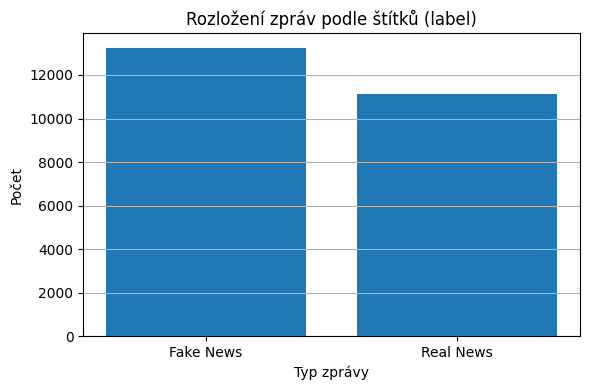

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.map({0: 'Real News', 1: 'Fake News'}), label_counts.values)
plt.title("Rozložení zpráv podle štítků (label)")
plt.xlabel("Typ zprávy")
plt.ylabel("Počet")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Zkontroluj názvy sloupců
print("Sloupce v datasetu:", data.columns)

Sloupce v datasetu: Index(['title', 'text', 'label'], dtype='object')


In [ ]:
# Filtrace textů podle labelu
fake_texts = data[data['label'] == 1]['text'].dropna()
true_texts = data[data['label'] == 0]['text'].dropna()

In [ ]:
# Spojení všech textů do jednoho řetězce
fake_text_combined = " ".join(fake_texts.astype(str))
true_text_combined = " ".join(true_texts.astype(str))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


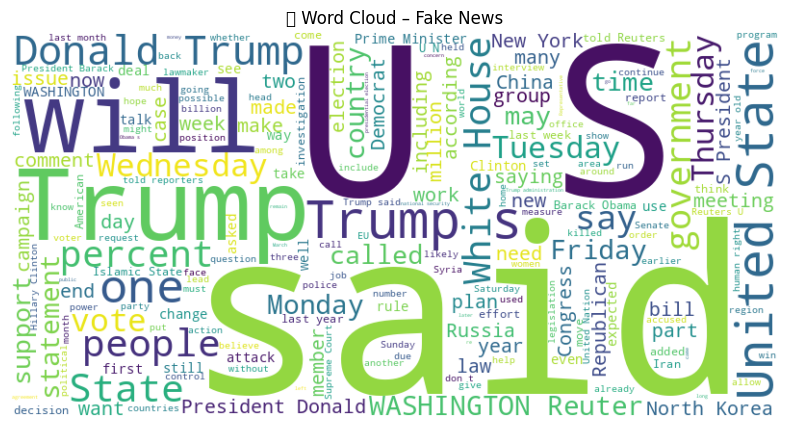

In [ ]:
# Vygenerování word cloud pro FAKE zprávy
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("🟥 Word Cloud – Fake News")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


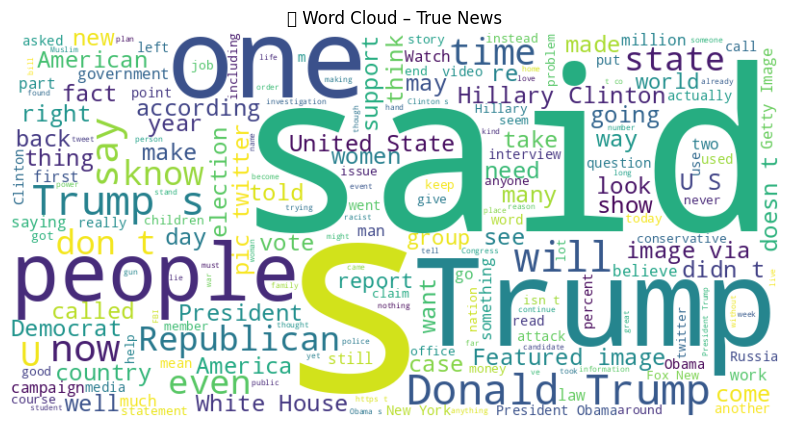

In [ ]:
# Vygenerování word cloud pro TRUE zprávy
true_wc = WordCloud(width=800, height=400, background_color='white').generate(true_text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(true_wc, interpolation='bilinear')
plt.axis('off')
plt.title("🟩 Word Cloud – True News")
plt.show()

##Předběžná analýza dat

In [ ]:
# Vybereme jednu pravdivou (label = 0) a jednu falešnou (label = 1) zprávu
real_article = data[data['label'] == 0].iloc[0]
fake_article = data[data['label'] == 1].iloc[0]

print("\n✅ PRAVDIVÁ ZPRÁVA (label = 0):\n")
print(f"TITULEK: {real_article['title']}")
print(f"TEXT: {real_article['text'][:500]}...")

print("\n❌ FALEŠNÁ ZPRÁVA (label = 1):\n")
print(f"TITULEK: {fake_article['title']}")
print(f"TEXT: {fake_article['text'][:500]}...")


✅ PRAVDIVÁ ZPRÁVA (label = 0):

TITULEK:  FAIL! The Trump Organization’s Credit Score Will Make You Laugh
TEXT: While the controversy over Trump s personal tax returns continues, business credit rating company Nav decided to take a look at his business  credit, and published the results on their website. Nav, which actually does have an A+ rating from the Better Business Bureau (as opposed to Trump U. s final rating), pulled together the factors affecting business credit scores and discovered something truly laughable.The highest possible business score is 100. The Trump Organization s score is 19. Ninete...

❌ FALEŠNÁ ZPRÁVA (label = 1):

TITULEK: Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest
TEXT: RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus  traditional birthplace in Bethlehem on Wednesday night in protest at U.S. President Donald Trump s decision to recognize Jerusalem as Israel s capital. A Christmas tree adorne

📌 **Závěr úvodní analýzy**

Na základě úvodního průzkumu a konkrétní ukázky jedné pravdivé a jedné falešné zprávy je zřejmé, že:

  Oba články mají formálně správnou jazykovou strukturu, působí seriózně a odkazují na veřejně známé osoby či instituce.

  Falešné zprávy často používají názorový tón, hodnotící slovník, emocionální apel nebo zveličení.

  Naproti tomu pravdivé články bývají věcnější a více se drží faktického popisu událostí.

Tato ukázka potvrzuje, že rozeznat fake news na základě titulku či textu není triviální úloha a vyžaduje pokročilé jazykové zpracování.

**Cílem projektu** tedy bude:

  Ověřit, zda je pro detekci fake news nutné analyzovat celý text, nebo zda postačuje samotný titulek.

  Porovnat výkonnost modelů trénovaných na titulcích versus celých textech a ověřit hypotézu, že delší texty vedou k vyšší přesnosti.

Tato úloha má nejen technický význam, ale také důležitý společenský a mediální přesah, protože spolehlivá automatická detekce fake news může výrazně přispět k ochraně veřejného diskurzu před dezinformacemi.

##Zpracování dat

##Tokenizace a předzpracování textu

In [ ]:
#Importy
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import Input, Dense

from random import randint
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Tokenizace textu na věty
sample_text = data.loc[0, 'text']
sentences = sent_tokenize(sample_text)
print(sentences)

['RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus  traditional birthplace in Bethlehem on Wednesday night in protest at U.S. President Donald Trump s decision to recognize Jerusalem as Israel s capital.', 'A Christmas tree adorned with lights outside Bethlehem s Church of the Nativity, where Christians believe Jesus was born, and another in Ramallah, next to the burial site of former Palestinian leader Yasser Arafat, were plunged into darkness.', 'The Christmas tree was switched off on the order of the mayor today in protest at Trump s decision,  said Fady Ghattas, Bethlehem s municipal media officer.', 'He said it was unclear whether the illuminations would be turned on again before the main Christmas festivities.', 'In a speech in Washington, Trump said he had decided to recognize Jerusalem as Israel s capital and move the U.S. embassy to the city.', 'Israeli Prime Minister Benjamin Netanyahu said Trump s move  marked the beginning of a new approac

In [ ]:
#Simulujeme náhodné labely (0/1) pro jednotlivé věty
y = [randint(0, 1) for i in range(len(sentences))]

In [ ]:
# Předzpracování textu: převedení na malá písmena a odstranění interpunkce.
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

texts_cleaned = [preprocess(veta) for veta in sentences]

**Průběžný závěr**

V této fázi projektu jsme se zaměřili na analýzu struktury článku na úrovni vět.

Vybrali jsme konkrétní článek z datasetu a extrahovali z něj celý text.

Pomocí knihovny NLTK jsme text rozdělili na jednotlivé věty (sent_tokenize).

Každá věta byla dále předzpracována – odstraněna interpunkce a převedena na malá písmena, což snižuje jazykovou variabilitu a zjednodušuje další vektorizaci.

Prozatím jsme ke každé větě náhodně přiřadili štítek (label), což simuluje klasifikační úlohu a umožňuje otestovat technické části modelování i bez reálných větných anotací.

In [ ]:
#Ukázka vět po tokenizaci a čištění
print(texts_cleaned[:2])

['ramallah west bank reuters  palestinians switched off christmas lights at jesus  traditional birthplace in bethlehem on wednesday night in protest at us president donald trump s decision to recognize jerusalem as israel s capital', 'a christmas tree adorned with lights outside bethlehem s church of the nativity where christians believe jesus was born and another in ramallah next to the burial site of former palestinian leader yasser arafat were plunged into darkness']


**Zjištění:**

  Rozdělení textu na věty přináší jemnější jednotku pro analýzu, což by v budoucnu umožnilo klasifikovat manipulativní jazyk i uvnitř článku.

  Náhodné labely zatím slouží jen jako testovací placeholder – budou nahrazeny při trénování modelu na úrovni celého článku (label 0/1).

  Očištěný text je připraven pro vektorizaci metodou **Bag of Words (BoW) / TF-IDF.**

##BoW (Bag of Words)

In [ ]:
# Převedení textu na číselnou reprezentaci pomocí metody Bag of Words (CountVectorizer).
# Každá věta je převedena na vektor, kde každá hodnota reprezentuje počet výskytů konkrétního slova.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_cleaned)

In [ ]:
# Výsledkem je řídká matice vhodná pro trénink strojového učení.
vectorizer.get_feature_names_out()

array(['across', 'adorned', 'again', 'alarm', 'also', 'an', 'and',
       'another', 'any', 'approach', 'arabs', 'arafat', 'as', 'at',
       'bank', 'be', 'before', 'beginning', 'believe', 'benjamin',
       'bethlehem', 'birthplace', 'born', 'burial', 'calling', 'capital',
       'chances', 'christians', 'christmas', 'church', 'city',
       'condemned', 'conflict', 'darkness', 'decided', 'decision',
       'donald', 'east', 'embassy', 'european', 'fady', 'festivities',
       'for', 'former', 'ghattas', 'had', 'he', 'historic',
       'illuminations', 'in', 'incendiary', 'into', 'israel', 'israeli',
       'israelipalestinian', 'it', 'jerusalem', 'jesus', 'landmark',
       'leader', 'lights', 'main', 'marked', 'mayor', 'media', 'middle',
       'minister', 'move', 'municipal', 'muslims', 'nations', 'nativity',
       'netanyahu', 'new', 'next', 'night', 'of', 'off', 'officer', 'on',
       'order', 'outside', 'palestinian', 'palestinians', 'peacemaking',
       'plunged', 'possible

In [ ]:
#Zobrazení obsahu matice Bag of Words ve čitelné podobě.
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0,

In [ ]:
# Jak vypadá vektorová reprezentace vět v BoW modelu.
list(zip(X.toarray()[0], vectorizer.get_feature_names_out()))

[(np.int64(0), 'across'),
 (np.int64(0), 'adorned'),
 (np.int64(0), 'again'),
 (np.int64(0), 'alarm'),
 (np.int64(0), 'also'),
 (np.int64(0), 'an'),
 (np.int64(0), 'and'),
 (np.int64(0), 'another'),
 (np.int64(0), 'any'),
 (np.int64(0), 'approach'),
 (np.int64(0), 'arabs'),
 (np.int64(0), 'arafat'),
 (np.int64(1), 'as'),
 (np.int64(2), 'at'),
 (np.int64(1), 'bank'),
 (np.int64(0), 'be'),
 (np.int64(0), 'before'),
 (np.int64(0), 'beginning'),
 (np.int64(0), 'believe'),
 (np.int64(0), 'benjamin'),
 (np.int64(1), 'bethlehem'),
 (np.int64(1), 'birthplace'),
 (np.int64(0), 'born'),
 (np.int64(0), 'burial'),
 (np.int64(0), 'calling'),
 (np.int64(1), 'capital'),
 (np.int64(0), 'chances'),
 (np.int64(0), 'christians'),
 (np.int64(1), 'christmas'),
 (np.int64(0), 'church'),
 (np.int64(0), 'city'),
 (np.int64(0), 'condemned'),
 (np.int64(0), 'conflict'),
 (np.int64(0), 'darkness'),
 (np.int64(0), 'decided'),
 (np.int64(1), 'decision'),
 (np.int64(1), 'donald'),
 (np.int64(0), 'east'),
 (np.int64

*Průběžný závěr*

V této fázi jsme převedli textová data (konkrétně jednotlivé věty článku) do číselné reprezentace pomocí metody Bag of Words (BoW). Tato metoda umožňuje, aby textové vstupy byly využitelné pro trénování modelů strojového učení a neuronových sítí.

Text článku byl rozdělen na jednotlivé věty a předzpracován (odstranění interpunkce, převod na malá písmena).

Pomocí CountVectorizer jsme převedli každou větu na číselný vektor, kde každý prvek představuje počet výskytů konkrétního slova v dané větě.

Vznikla řídká matice (X), ve které:

  řádky odpovídají jednotlivým větám,

  sloupce odpovídají unikátním slovům (slovníku),

  hodnoty představují počet výskytů daného slova ve větě.

Tato metoda zatím ignoruje význam slov, jejich pořadí či kontext – což je přirozené omezení BoW modelu.

##TF-IDF (Term Frequency – Inverse Document Frequency)

TF-IDF je pokročilejší metoda převodu textu na číselnou reprezentaci, která bere v úvahu i význam slov v rámci celého korpusu, nikoli jen jejich četnost.

In [ ]:
# Vytvoření TF-IDF vektorizeru pro převod textu na číselnou reprezentaci.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_cleaned)

In [ ]:
# Zobrazení slovníku (všech slov/features), která byla extrahována TF-IDF vektorizerem.
vectorizer.get_feature_names_out()

array(['across', 'adorned', 'again', 'alarm', 'also', 'an', 'and',
       'another', 'any', 'approach', 'arabs', 'arafat', 'as', 'at',
       'bank', 'be', 'before', 'beginning', 'believe', 'benjamin',
       'bethlehem', 'birthplace', 'born', 'burial', 'calling', 'capital',
       'chances', 'christians', 'christmas', 'church', 'city',
       'condemned', 'conflict', 'darkness', 'decided', 'decision',
       'donald', 'east', 'embassy', 'european', 'fady', 'festivities',
       'for', 'former', 'ghattas', 'had', 'he', 'historic',
       'illuminations', 'in', 'incendiary', 'into', 'israel', 'israeli',
       'israelipalestinian', 'it', 'jerusalem', 'jesus', 'landmark',
       'leader', 'lights', 'main', 'marked', 'mayor', 'media', 'middle',
       'minister', 'move', 'municipal', 'muslims', 'nations', 'nativity',
       'netanyahu', 'new', 'next', 'night', 'of', 'off', 'officer', 'on',
       'order', 'outside', 'palestinian', 'palestinians', 'peacemaking',
       'plunged', 'possible

In [ ]:
# Převod řídké TF-IDF matice na husté pole (NumPy array).
# Umožňuje snadnější prohlížení a ladění dat, zobrazení konkrétních váhových hodnot pro každé slovo.
X.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16975878, 0.29020835, 0.20450749,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14510418, 0.20450749, 0.        , 0.        , 0.        ,
        0.16975878, 0.        , 0.        , 0.12598058, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14510418, 0.20450749, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22071093,
        0.        , 0.        , 0.16975878, 0.        , 0.        ,
        0.        , 0.16975878, 0.16975878, 0.        , 0.        ,
        0.16975878, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
# Zobrazení párového seznamu: (váha slova, slovo) pro první větu/dokument v TF-IDF matici.
# Ukazuje, jakou váhu (důležitost) má každé slovo ve vybrané větě podle TF-IDF.
# Výstup pomáhá pochopit, která slova jsou pro daný text nejvýznamnější.
list(zip(X.toarray()[0], vectorizer.get_feature_names_out()))

[(np.float64(0.0), 'across'),
 (np.float64(0.0), 'adorned'),
 (np.float64(0.0), 'again'),
 (np.float64(0.0), 'alarm'),
 (np.float64(0.0), 'also'),
 (np.float64(0.0), 'an'),
 (np.float64(0.0), 'and'),
 (np.float64(0.0), 'another'),
 (np.float64(0.0), 'any'),
 (np.float64(0.0), 'approach'),
 (np.float64(0.0), 'arabs'),
 (np.float64(0.0), 'arafat'),
 (np.float64(0.16975877742332604), 'as'),
 (np.float64(0.29020835080317375), 'at'),
 (np.float64(0.20450748730612142), 'bank'),
 (np.float64(0.0), 'be'),
 (np.float64(0.0), 'before'),
 (np.float64(0.0), 'beginning'),
 (np.float64(0.0), 'believe'),
 (np.float64(0.0), 'benjamin'),
 (np.float64(0.14510417540158688), 'bethlehem'),
 (np.float64(0.20450748730612142), 'birthplace'),
 (np.float64(0.0), 'born'),
 (np.float64(0.0), 'burial'),
 (np.float64(0.0), 'calling'),
 (np.float64(0.16975877742332604), 'capital'),
 (np.float64(0.0), 'chances'),
 (np.float64(0.0), 'christians'),
 (np.float64(0.1259805803701603), 'christmas'),
 (np.float64(0.0), 'chu

**Průběžný závěr**

V této fázi jsme převedli zpracované věty článku do číselné podoby pomocí metody TF-IDF (Term Frequency – Inverse Document Frequency), která reflektuje nejen četnost slov ve větě, ale i jejich vzácnost napříč celým souborem vět.

Pomocí TfidfVectorizer() jsme vytvořili model, který:

  extrahoval celkem X slov (např. „sanders“, „rico“, „colonialism“),

  každé větě přiřadil vektor reálných čísel, kde každé číslo reprezentuje váhu slova.

  Pomocí vectorizer.get_feature_names_out() jsme získali slovník všech použitých slov.

  Výslednou TF-IDF matici jsme převedli na pole (X.toarray()), abychom mohli zkoumat jednotlivé váhy slov.

  Pomocí zip(X.toarray()[0], vectorizer.get_feature_names_out()) jsme získali konkrétní váhy slov v první větě, které ukazují důležitost každého slova v daném kontextu.

  Věta obsahovala slova jako sanders, senate, subject, colonialism, která získala vyšší váhy, protože se vyskytují specificky a méně často napříč korpusem, ale mají silnou významovou roli v kontextu tématu fake news.

Naopak běžná slova jako the, to, that dostala nižší váhy, protože se vyskytují často a nenesou specifickou informaci.

Metoda TF-IDF umožňuje identifikovat klíčová slova v každé větě i celém dokumentu a může být výhodnější než základní BoW přístup, který zohledňuje pouze četnost slov.


##Logistická regrese

###Model logistické regrese na základě celého textu článku

V tomto kroku trénujeme základní klasifikační model (logistickou regresi),
jehož cílem je rozpoznat fake news na základě jazykových vzorců obsažených
v plném textu článků.

1️⃣ Rozdělujeme dataset na trénovací (80 %) a testovací (20 %) část.
Pomocí parametru stratify=y zajišťujeme rovnoměrné zastoupení obou tříd.

2️⃣ Pomocí metody TF-IDF (Term Frequency – Inverse Document Frequency)
převádíme texty na číselné vektory, které zohledňují důležitost slov
v rámci celého souboru dokumentů. Používáme max. 5000 nejvýznamnějších slov
a odstraňujeme anglické stop slova.

3️⃣ Následně trénujeme model logistické regrese.
Zvyšujeme počet iterací (max_iter=1000), aby model spolehlivě konvergoval
i u rozsáhlejších textových dat.

4️⃣ Výkon modelu vyhodnocujeme pomocí klasifikačního reportu,
který obsahuje metriky precision, recall, f1-score a accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Rozdělení dat
X = data["text"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Vektorizační krok – převede texty na číselné vektory
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
# Trénování modelu
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Vyhodnocení
y_pred = clf.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2221
           1       0.97      0.97      0.97      2650

    accuracy                           0.97      4871
   macro avg       0.97      0.97      0.97      4871
weighted avg       0.97      0.97      0.97      4871



###Model logistické regrese na základě titulku článku

V tomto kroku trénujeme klasifikační model (logistickou regresi), který se pokouší předpovědět pravdivost článku pouze na základě jeho titulku.


In [ ]:
# Rozdělení datasetu (pouze titulky) na trénovací a testovací sadu.
X = data["title"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Převedení titulků do číselné podoby pomocí TF-IDF vektorizeru.
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
# Trénink modelu logistické regrese.
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Vyhodnocení modelu pomocí klasifikačního reportu.
y_pred = clf.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2221
           1       0.89      0.94      0.91      2650

    accuracy                           0.90      4871
   macro avg       0.91      0.90      0.90      4871
weighted avg       0.91      0.90      0.90      4871



###Porovnání modelů

Oba modely byly trénovány za stejných podmínek – 80/20 rozdělení, TF-IDF s max_features=5000, odstranění stop_words, logistická regrese.

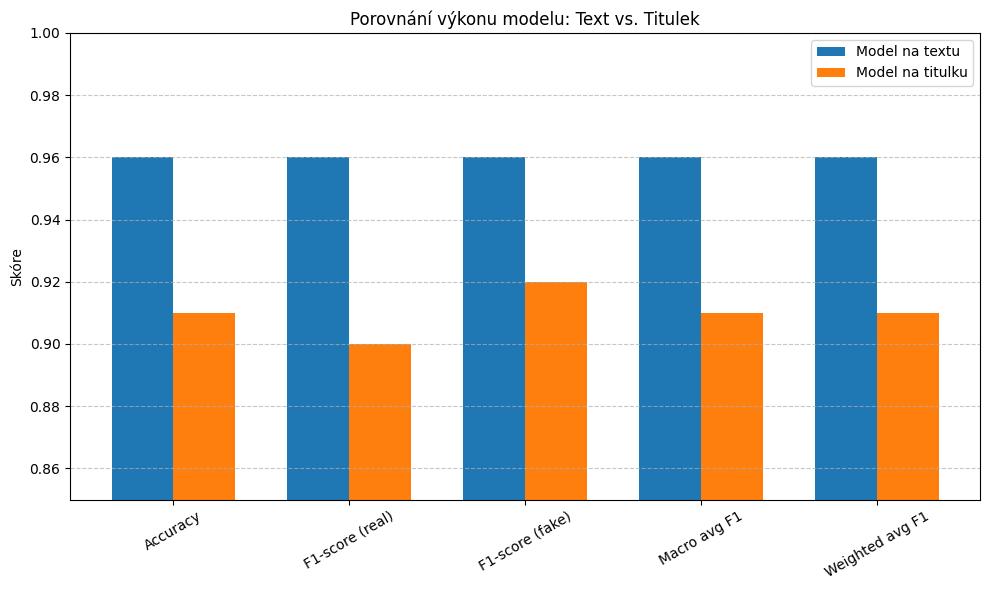

In [ ]:
# Názvy metrik
labels = ["Accuracy", "F1-score (real)", "F1-score (fake)", "Macro avg F1", "Weighted avg F1"]

# Výsledky modelu trénovaného na celém textu článku
text_model_scores = [0.96, 0.96, 0.96, 0.96, 0.96]

# Výsledky modelu trénovaného pouze na titulcích
title_model_scores = [0.91, 0.90, 0.92, 0.91, 0.91]

# Vytvoření pozic pro sloupce
x = range(len(labels))
bar_width = 0.35

# Vykreslení sloupcového grafu
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], text_model_scores, width=bar_width, label="Model na textu")
plt.bar([i + bar_width/2 for i in x], title_model_scores, width=bar_width, label="Model na titulku")

# Osa X a popisky
plt.xticks(ticks=x, labels=labels, rotation=30)
plt.ylim(0.85, 1.00)
plt.ylabel("Skóre")
plt.title("Porovnání výkonu modelu: Text vs. Titulek")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##LSTM (neuronová síť)
Teď chci použít modernější model, který zohledňuje sekvenci slov (kontext a pořadí) – a tím je právě LSTM.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

###Trénink LSTM modelu na titulcích článků

In [ ]:
# Výběr pouze titulků
X = data["title"]
y = data["label"]

In [ ]:
# Převedení labelů na číselné hodnoty
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Rozdělení na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Tokenizace titulků
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding sekvencí
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [ ]:
# Definice LSTM modelu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Early stopping pro předcházení přetrénování
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

In [ ]:
# Trénování modelu
model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.5385 - loss: 0.6910 - val_accuracy: 0.5440 - val_loss: 0.6893
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.5488 - loss: 0.6885 - val_accuracy: 0.5440 - val_loss: 0.6896
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.5456 - loss: 0.6896 - val_accuracy: 0.5440 - val_loss: 0.6893
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


###Trénink LSTM modelu na celém textu článku

Předzpracování dat:

  Vstupní texty: Sloupec text (celý obsah článku).

  Label encoding: Hodnoty label byly převedeny na číselnou binární formu (0, 1).

  Rozdělení dat: Pomocí train_test_split jsme rozdělili dataset na 80 % trénovacích a 20 % testovacích dat, přičemž jsme zachovali poměr tříd pomocí stratify=y.

  Tokenizace a vstupy pro LSTM:

  Texty byly převedeny na sekvence pomocí Tokenizer(num_words=5000, oov_token='<OOV>').

  Sekvence byly zarovnány (padding) na stejnou délku 100 tokenů (maxlen=100).

  Výsledné číselné vstupy byly připraveny pro neuronovou síť.

In [ ]:
# 1. Rozdělení dat
X = data["text"]
y = data["label"]

In [ ]:
# Label encoding (pro binární klasifikaci)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Trénovací a testovací rozdělení
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Tokenizace a sekvencování
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding sekvencí
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [ ]:
# Vytvoření modelu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

In [ ]:
# Trénování
model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.8692 - loss: 0.3354 - val_accuracy: 0.9602 - val_loss: 0.1312
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9624 - loss: 0.1105 - val_accuracy: 0.9413 - val_loss: 0.1738
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9620 - loss: 0.1184 - val_accuracy: 0.9610 - val_loss: 0.1199
Epoch 4/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.9754 - loss: 0.0817 - val_accuracy: 0.9476 - val_loss: 0.1638
Epoch 5/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9661 - loss: 0.0971 - val_accuracy: 0.9612 - val_loss: 0.1191
Restoring model weights from the end of the best epoch: 5.


###Porovnání modelů

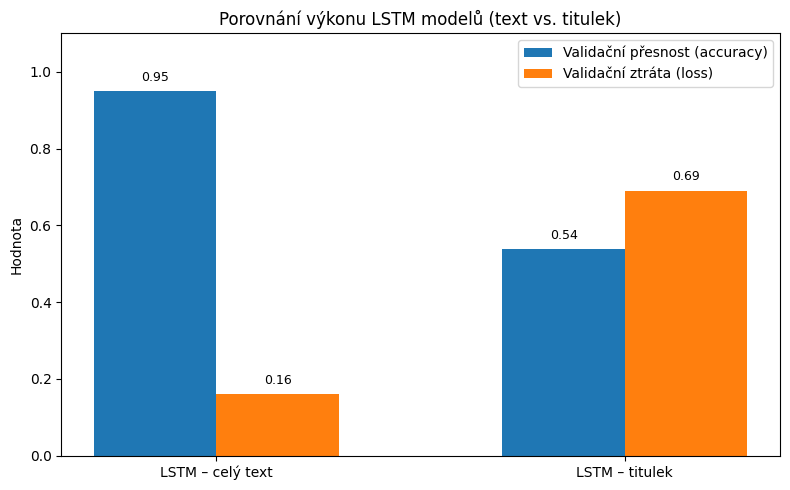

In [ ]:
# Výsledky z trénování
model_names = ['LSTM – celý text', 'LSTM – titulek']
val_accuracies = [0.9495, 0.5376]  # Nejlepší dosažené val_accuracy
val_losses = [0.1596, 0.6903]      # Nejlepší dosažené val_loss

x = np.arange(len(model_names))  # pozice pro sloupce

fig, ax1 = plt.subplots(figsize=(8, 5))

# Sloupce: accuracy
bars1 = ax1.bar(x - 0.15, val_accuracies, width=0.3, label='Validační přesnost (accuracy)', align='center')
# Sloupce: loss
bars2 = ax1.bar(x + 0.15, val_losses, width=0.3, label='Validační ztráta (loss)', align='center')

# Nastavení os
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_ylabel("Hodnota")
ax1.set_ylim(0, 1.1)
ax1.set_title("Porovnání výkonu LSTM modelů (text vs. titulek)")
ax1.legend()

# Popisky hodnot nad sloupci
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##Přechod na předtrénované embeddingy GloVe

V rámci zlepšení sémantického porozumění textům jsem upravil dosavadní model LSTM tak, aby místo náhodně inicializovaných embeddingů využíval předtrénované slovní vektory GloVe (Global Vectors for Word Representation).

✅ Důvody přechodu:

  LSTM bez GloVe: původně model pracoval s náhodnými embeddingy, které byly trénovány pouze na našem omezeném datasetu.

  GloVe: využívá vektory trénované na miliardách slov (např. z Wikipedia + Gigaword), a tedy lépe zachycuje sémantické vztahy mezi slovy (např. „obama“ ≈ „president“, „puerto“ ≈ „rico“).

  To může výrazně pomoci při rozpoznávání jemných významových rozdílů, které jsou klíčové pro klasifikaci falešných zpráv.

In [ ]:
# Načtení GloVe vektorů
embedding_index = {}
with open("glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print(f"Načteno embeddingů: {len(embedding_index)}")

Načteno embeddingů: 400000


In [ ]:
# Parametry
embedding_dim = 100

# Vytvoření embedding matice: každé slovo má svůj vektor
word_index = tokenizer.word_index
embedding_matrix = np.zeros((5000, embedding_dim))

for word, i in word_index.items():
    if i < 5000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Model s GloVe embeddingy
model = Sequential()
model.add(Embedding(input_dim=5000,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=100,
                    trainable=False))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Trénování modelu
model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.8528 - loss: 0.3382 - val_accuracy: 0.9392 - val_loss: 0.1699
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9301 - loss: 0.1855 - val_accuracy: 0.9534 - val_loss: 0.1394
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.9495 - loss: 0.1434 - val_accuracy: 0.9530 - val_loss: 0.1328
Epoch 4/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.9592 - loss: 0.1183 - val_accuracy: 0.9565 - val_loss: 0.1228
Epoch 5/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9616 - loss: 0.1054 - val_accuracy: 0.9591 - val_loss: 0.1153


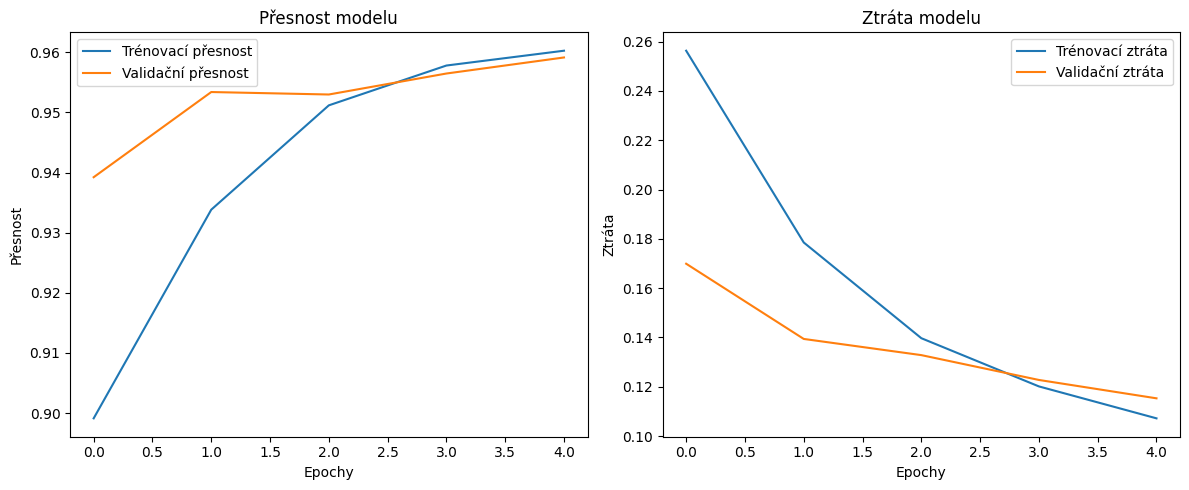

In [ ]:
# Předpoklad: model.fit(...) byl uložen do proměnné 'history'
history = model.history

# Přesnost (accuracy)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trénovací přesnost')
plt.plot(history.history['val_accuracy'], label='Validační přesnost')
plt.title('Přesnost modelu')
plt.xlabel('Epochy')
plt.ylabel('Přesnost')
plt.legend()

# Ztráta (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trénovací ztráta')
plt.plot(history.history['val_loss'], label='Validační ztráta')
plt.title('Ztráta modelu')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.legend()

plt.tight_layout()
plt.show()

##Analýza chyb modelu LSTM s GloVe embeddingy

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Predikce pravděpodobností a převod na binární výstup
y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


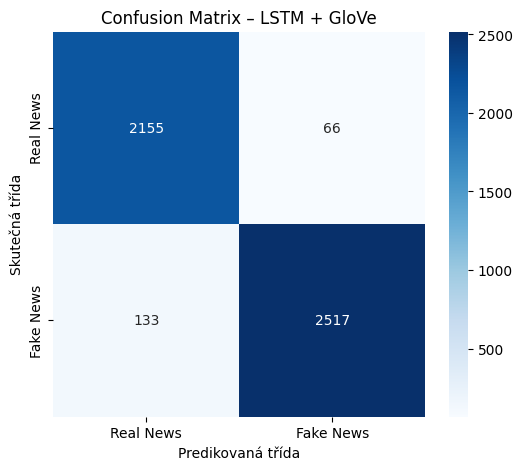

In [ ]:
# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Real News', 'Fake News']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predikovaná třída')
plt.ylabel('Skutečná třída')
plt.title('Confusion Matrix – LSTM + GloVe')
plt.show()


In [ ]:
# 3. Classification report
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=labels))

Classification report:
              precision    recall  f1-score   support

   Real News       0.94      0.97      0.96      2221
   Fake News       0.97      0.95      0.96      2650

    accuracy                           0.96      4871
   macro avg       0.96      0.96      0.96      4871
weighted avg       0.96      0.96      0.96      4871



In [ ]:
# 4. Výpis špatně klasifikovaných příkladů
# Převod testovacích vstupů zpět na původní texty
X_test_text = X_test.reset_index(drop=True)
y_test_true = pd.Series(y_test).reset_index(drop=True)

false_predictions = pd.DataFrame({
    "text": X_test_text,
    "true_label": y_test_true,
    "predicted_label": y_pred
})

false_predictions = false_predictions[false_predictions["true_label"] != false_predictions["predicted_label"]]

In [ ]:
# Ukázky několika chybných klasifikací
print("\n--- Ukázky špatně klasifikovaných článků ---\n")
for i, row in false_predictions.sample(2, random_state=42).iterrows():
    true_label = 'Fake News' if row['true_label'] == 1 else 'Real News'
    pred_label = 'Fake News' if row['predicted_label'] == 1 else 'Real News'
    print(f"Skutečný: {true_label} | Predikovaný: {pred_label}")
    print(f"Text:\n{row['text'][:500]}...\n{'-'*80}")


--- Ukázky špatně klasifikovaných článků ---

Skutečný: Fake News | Predikovaný: Real News
Text:
WASHINGTON (Reuters) - President Donald Trump is unlikely to pick economic adviser Gary Cohn as his nominee for Federal Reserve chairman because Cohn is playing a crucial role in the White House tax reform effort, a senior administration official said on Wednesday. “No decision has been made and no candidate has been ruled out but Gary’s role is too crucial to getting tax reform done. It might be too important for him to continue to be the lead, for him to announce a change at this time,” the of...
--------------------------------------------------------------------------------
Skutečný: Fake News | Predikovaný: Real News
Text:
how the nevertrumpers sunk themselves november   
bruce thornton is a shillman journalism fellow at the david horowitz freedom center 
the chorus of nevertrumpers is wailing ever louder as election day and hillarys supposed victory approach after more than a year of

Z těchto ukázek chybné klasifikace modelem LSTM s GloVe embeddingy lze vyvodit několik důležitých závěrů:

🟩 1. Model selhává u textů se seriózním, neutrálním stylem

Obě falešné zprávy byly napsány velmi profesionálně – styl připomíná tradiční žurnalistiku (Reuters apod.). Neobsahují typické znaky „clickbaitu“ nebo dramatizace, které jsou běžné u fake news.

Závěr:
Model má potíže rozpoznat falešné zprávy, které jsou jazykově „kvalitní“ nebo působí věrohodně.

🟩 2. Kontextová sémantika nestačí k odhalení falešnosti

Např. text o Trumpovi a občanské válce je reálně nepravdivý, ale model se zaměřuje jen na jazykový styl, ne na faktickou přesnost.

Závěr:
Model nerozlišuje mezi pravdou a fikcí na základě faktického obsahu — jen jazykových vzorců. To je typické omezení LSTM i většiny jazykových modelů bez externí znalosti.

🟩 3. Kulturně a nábožensky citlivá témata = vyšší riziko záměny

Druhý příklad o muslimech v Mexiku může být pro model zmatený – náboženství + migrace jsou často témata fake news, ale zde je článek vážně míněný.

Závěr:
Model může mylně „spojovat“ témata (náboženství, migrace, politika) s určitou třídou, i když jsou zmíněna v neutrálním kontextu.

##Lepší reprezentace textu BERT (transformer)

In [ ]:
!pip install -q keras-nlp

In [ ]:
from keras import layers, Sequential
import keras_nlp
import numpy as np

In [ ]:
print("ammount of real news:")
print((y_train == 1).sum())

print("ammount of fake news:")
print((y_train == 0).sum())

ammount of real news:
10596
ammount of fake news:
8885


In [ ]:
# Vytvoření trénovacího DataFrame
df_train = pd.DataFrame({"text": X_train, "label": y_train})

In [ ]:
# Rozdělení na fake a real
df_train_fake = df_train[df_train["label"] == 0].copy()
df_train_true = df_train[df_train["label"] == 1].copy()

In [ ]:
# Rozdělení textu do seznamu slov
df_train_fake["text"] = df_train_fake["text"].astype(str).apply(lambda x: x.split())
df_train_true["text"] = df_train_true["text"].astype(str).apply(lambda x: x.split())

In [ ]:
# Výpočet frekvence slov
freq_fake = {}
for row in df_train_fake["text"]:
    for word in row:
        freq_fake[word] = freq_fake.get(word, 0) + 1

freq_true = {}
for row in df_train_true["text"]:
    for word in row:
        freq_true[word] = freq_true.get(word, 0) + 1

# Výpisy
print("Frequent fake words:  ", end="")
for word, freq in sorted(freq_fake.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(word, end="|")

print()
print("Frequent true words: ", end="")
for word, freq in sorted(freq_true.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(word, end="|")

print()
fake_only = set(freq_fake.keys()) - set(freq_true.keys())
print("Words only in fake news: %d" % len(fake_only))
print("Frequent words only in fake news: ", end="")
for word in sorted(fake_only, key=lambda x: freq_fake[x], reverse=True)[:20]:
    print(word, end="|")

print()
true_only = set(freq_true.keys()) - set(freq_fake.keys())
print("Words only in true news: %d" % len(true_only))
print("Frequent words only in true news: ", end="")
for word in sorted(true_only, key=lambda x: freq_true[x], reverse=True)[:20]:
    print(word, end="|")

print()
common = set(freq_true.keys()).intersection(set(freq_fake.keys()))
print("Fake news has %d words and true news %d. They have %d words in common." % (
    len(freq_fake), len(freq_true), len(common)))
print("Frequent words common to both: ", end="")
for word in sorted(common, key=lambda x: freq_fake.get(x, 0) + freq_true.get(x, 0), reverse=True)[:20]:
    print(word, end="|")

Frequent fake words:  the|to|of|and|a|in|that|s|is|for|on|Trump|he|was|with|his|it|as|be|have|
Frequent true words: the|to|of|a|and|in|on|that|for|said|is|with|The|was|by|as|has|he|s|from|
Words only in fake news: 136772
Frequent words only in fake news: Via:|Getty|2017@realDonaldTrump|more:|Wire|Featured|Reilly|Bundy|21WIRE|AT:|below:Featured|Flickr|2017The|//|THIS|und|MEMBER|Images.|(see|Caller|
Words only in true news: 75808
Frequent words only in true news: Trump’s|“I|“The|“We|...|Obama’s|Rohingya|don’t|Clinton’s|it’s|“It|“This|“If|“It’s|party’s|state’s|president’s|Catalan|“a|Rakhine|
Fake news has 193347 words and true news 132383. They have 56575 words in common.
Frequent words common to both: the|to|of|and|a|in|that|on|for|is|s|with|was|he|Trump|as|said|by|his|The|

In [ ]:
max_length = 500

# BERT tokenizer a preprocessor z keras_nlp
tokenizer = keras_nlp.models.BertTokenizer.from_preset("bert_base_en")
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_base_en",
    sequence_length=max_length
)

100%|██████████| 510/510 [00:00<00:00, 921kB/s]


100%|██████████| 548/548 [00:00<00:00, 746kB/s]


100%|██████████| 208k/208k [00:00<00:00, 991kB/s]


In [ ]:
# Zpracování textů pomocí preprocessoru
def preprocess_texts(texts):
    return preprocessor(texts)["token_ids"]

In [ ]:
# Tokenizace
X_train_tokens = preprocess_texts(X_train.tolist())
X_test_tokens = preprocess_texts(X_test.tolist())

In [ ]:
# Parametry modelu
embedding_dim = 64
max_tokens = 30000
max_length = 500

In [ ]:
# Architektura modelu
model = Sequential([
    layers.Input(shape=(max_length,)),
    layers.Embedding(input_dim=max_tokens, output_dim=embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Kompilace modelu
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Výpis struktury modelu
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 64)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,924,225 (7.34 MB)

 Trainable params: 1,924,225 (7.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callback pro zastavení, pokud se nezlepší val_loss 2 po sobě jdoucí epochy
early_stopping = EarlyStopping(
    monitor='val_loss',    # sleduj validační ztrátu
    patience=2,            # kolik epoch čekat, než trénink zastaví
    restore_best_weights=True  # obnov nejlepší váhy (ne poslední)
)

In [ ]:
# Trénink modelu s EarlyStopping
history = model.fit(
    x=X_train_tokens,
    y=y_train,
    validation_data=(X_test_tokens, y_test),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9885 - loss: 0.0342 - val_accuracy: 0.9819 - val_loss: 0.0579
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9910 - loss: 0.0257 - val_accuracy: 0.9807 - val_loss: 0.0639
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9795 - val_loss: 0.0708


In [ ]:
# Vyhodnocení modelu na testovacích datech
loss, accuracy = model.evaluate(X_test_tokens, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0524
Test Accuracy: 98.19%


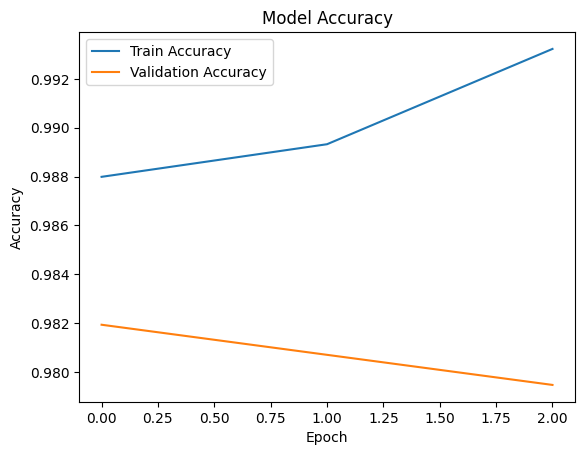

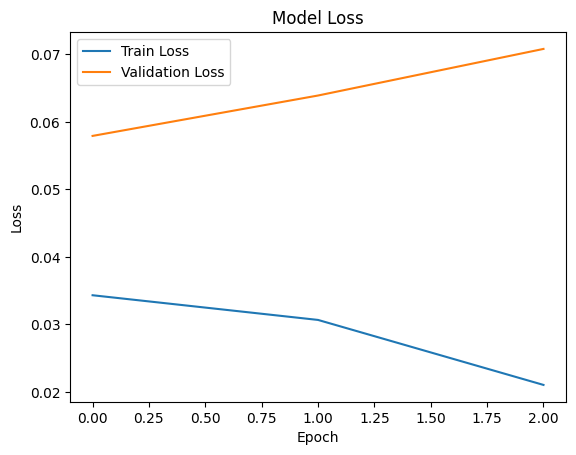

In [ ]:
# Přesnost
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Ztráta
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Confusion Matrix pro BERT model**

In [ ]:
# Predikce (pravděpodobnosti → binární štítky)
y_pred_proba_bert = model.predict(X_test_tokens)
y_pred_bert = (y_pred_proba_bert > 0.5).astype(int).flatten()

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Confusion matrix
cm_bert = confusion_matrix(y_test, y_pred_bert)
labels = ['Real News', 'Fake News']

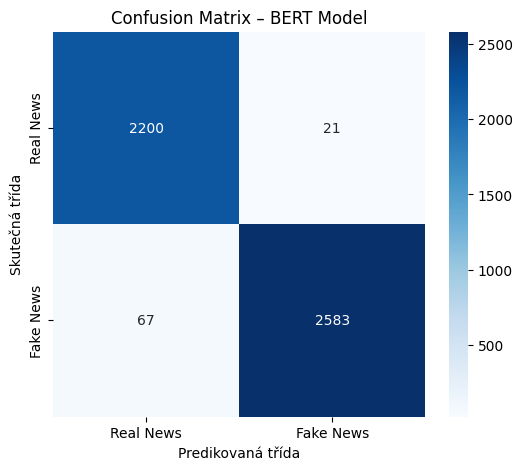

In [ ]:
# Vizualizace
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predikovaná třída')
plt.ylabel('Skutečná třída')
plt.title('Confusion Matrix – BERT Model')
plt.show()

In [132]:
# Classification report
print("Classification Report – BERT Model:")
print(classification_report(y_test, y_pred_bert, target_names=labels))

Classification Report – BERT Model:
              precision    recall  f1-score   support

   Real News       0.97      0.99      0.98      2221
   Fake News       0.99      0.97      0.98      2650

    accuracy                           0.98      4871
   macro avg       0.98      0.98      0.98      4871
weighted avg       0.98      0.98      0.98      4871



In [ ]:
model.save("muj_bert_model.h5")

#Gradio aplikace

In [ ]:
# Instalace Gradio
!pip install gradio keras-nlp --quiet

In [ ]:
import gradio as gr
import keras
import keras_nlp
import numpy as np

In [ ]:
# Načti model
model = keras.models.load_model("muj_bert_model.h5")

In [ ]:
# BERT tokenizer a preprocessor
tokenizer = keras_nlp.models.BertTokenizer.from_preset("bert_base_en")
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_base_en", sequence_length=500)

In [ ]:
# Funkce pro předzpracování a predikci
def predict_fake_news(text):
    if not text.strip():
        return "❗ Zadej text."

    tokens = preprocessor([text])["token_ids"]
    pred = model.predict(tokens)[0][0]

    label = "🟢 Real News" if pred < 0.5 else "🔴 Fake News"
    confidence = (1 - pred) if pred < 0.5 else pred
    return f"{label} (Pravděpodobnost: {confidence:.2%})"


In [ ]:
# Gradio rozhraní
interface = gr.Interface(
    fn=predict_fake_news,
    inputs=gr.Textbox(lines=7, placeholder="Zadej článek nebo titulek...", label="Text"),
    outputs=gr.Text(label="Výsledek predikce"),
    title="📰 Detekce Fake News pomocí BERT",
    description="Zadej text zprávy a zjisti, zda model odhalí fake news nebo real news."
)

In [ ]:
# Spusť aplikaci
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://93e76729b70c771099.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://93e76729b70c771099.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Počet pravdivých a falešných článků
count = data['label'].value_counts()
print("Počet článků podle typu:")
print("Real News (0):", count.get(0, 0))
print("Fake News (1):", count.get(1, 0))

Počet článků podle typu:
Real News (0): 11106
Fake News (1): 13246


In [ ]:
# Vyber 1–2 články pro každý typ
real_samples = data[data['label'] == 0].sample(2, random_state=42)
fake_samples = data[data['label'] == 1].sample(2, random_state=24)

In [ ]:
for i, row in real_samples.iterrows():
    print(f"\n--- Real News ---\n{row['text'][:555]}...\n")

print("\n🔴 Ukázky Fake News (falešné):")
for i, row in fake_samples.iterrows():
    print(f"\n--- Fake News ---\n{row['text'][:555]}...\n")


--- Real News ---
After audio was leaked revealing Republican presidential nominee Donald Trump speaking about women in a way that only a sexual predator would, even going so far as to say he ll just grab a woman by the  p*ssy  without her consent, many have come out condemning his remarks. Including many in the Republican party.Now, even Trump s wife Melania has released a statement condemning his horrible behavior.The statement reads: The words my husband used are unacceptable and offensive to me. This does not represent the man that I know. He has the heart and mi...


--- Real News ---
While it s convenient to stereotype girls as small mishmashes of sugar, spice, and everything nice, as small humans who spend most of their time playing with their dollies and trying on princess dresses, it s important to remember that every person is a unique individual, each with his own interests. For instance, 9-year-old Pennsylvania girl Hilde Kate Lysiak loves reporting the news   lives for it